In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
print("Imports Successful")

Imports Successful


1. No primeiro circuito temos um canal seguro: 
Envio |0> e chega |0> no final. A ideia de duas portas H é que existe uma operação qualquer nesse canal e no final, antes da medicação, ela é revertida, como um decodificador.

2. No Segundo Circuito, temos um Easvesdropper: "bisbilhoteiro"
Alguem mediu antes do tempo o qubit, então ele colapsou. Quando chega no final podemos ver que existe tanto medicação de 0 (como deveria ser) quanto de 1 , indicando que ocorreu alguma medicção antes

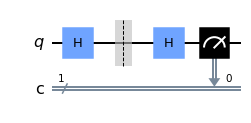

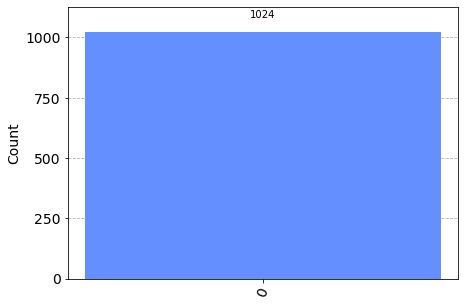

In [3]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Alice now sends the qubit to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw(output='mpl'))
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

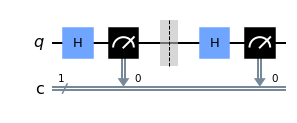

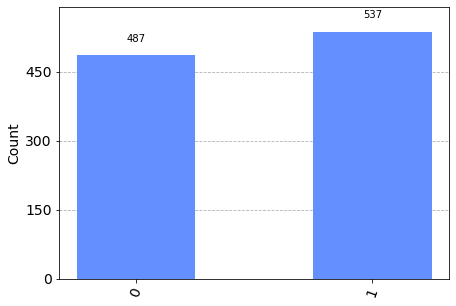

In [5]:
qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw(output='mpl'))
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())